### GW tutorial 2: Detector noise and GW150914

Author: Melissa Lopez

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [1]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [3]:
m = Merger('GW150914')
ifo = 'L1'
data = m.strain(ifo)

print(data)

[-1.00432555e-18 -9.58114996e-19 -9.03059379e-19 ... -1.10862808e-18
 -1.13349772e-18 -1.12487097e-18]


**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [4]:
#display important information about the time series data
print("Duration of time series:", data.duration) #total time
print("Sampling rate:", data.sample_rate) #rate at which the data points were sampled
print("Number of data:", len(data)) #total number of data points

#calculate time difference between samples (inverse of the sample rate)
delta_t = 1 /data.sample_rate
print("Delta t:", delta_t)

#calculate the frequency resolution (inverse of the sample rate)
delta_f = 1 / data.duration
print("Delta f:", delta_f)

#check if the number of data points is consistent with the duration and sample rate
print("Check relation:", len(data) == data.duration *data.sample_rate)

Duration of time series: 32.0
Sampling rate: 4096.0
Number of data: 131072
Delta t: 0.000244140625
Delta f: 0.03125
Check relation: True


The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

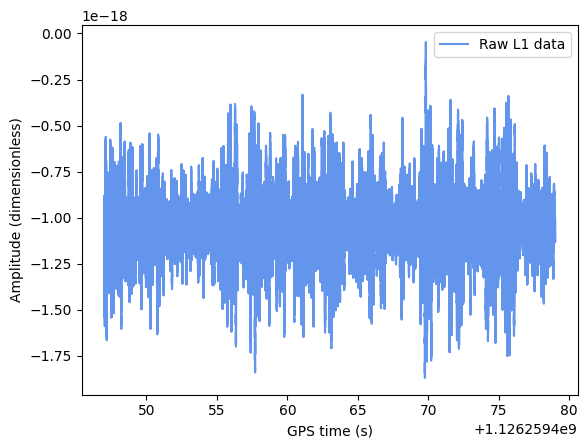

In [5]:
#already provided

plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

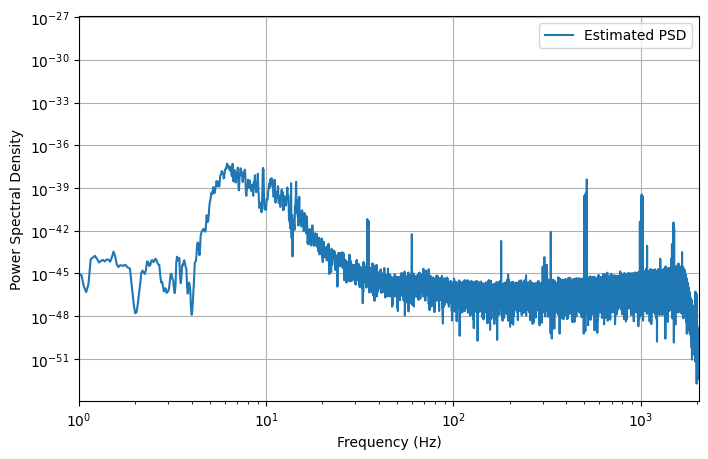

In [6]:
#calculate the Nyquist frequency
#Nyquist frequency is half the sampling rate, represents the highest frequency that can be accurately sampled
Nyquist = data.sample_rate / 2

#estimate the Power Spectral Density (PSD) of the rawdata
psd = data.filter_psd(data.duration, data.delta_f, 1)


# Plot the PSD
plt.figure(figsize=(8, 5))
plt.loglog(psd.get_sample_frequencies(), psd, label="Estimated PSD") #PSD on a logaritmic scale
plt.xlim(1, Nyquist) #x-axis limit to range from 1 Hz to the Nyquist frequency
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid()
plt.show()

The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


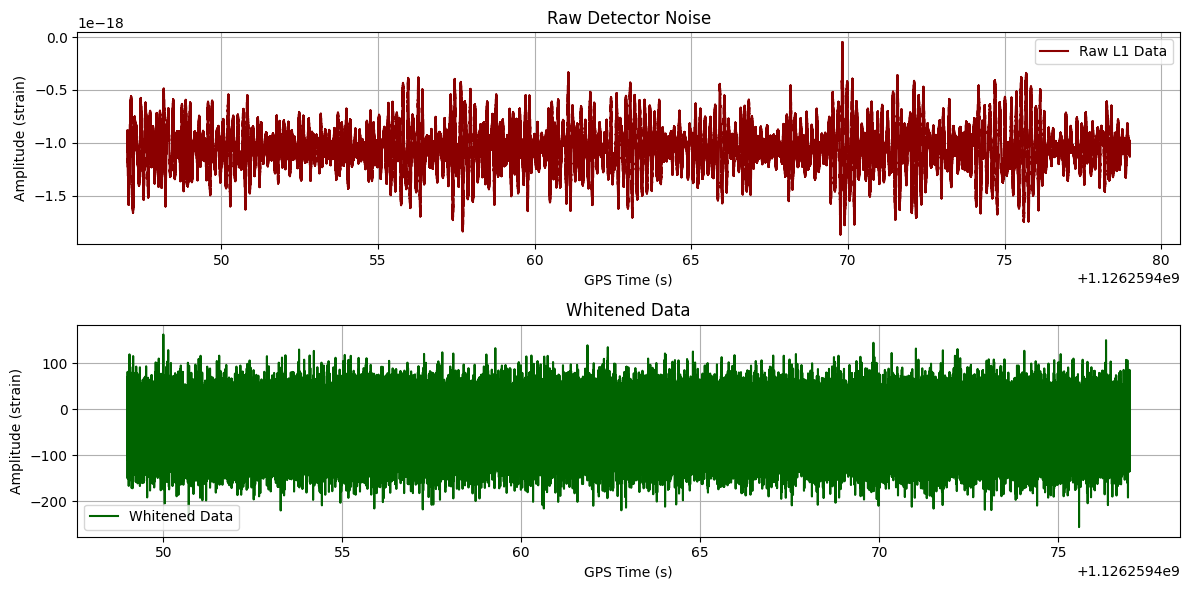

In [8]:
# Whiten the data
whitened_data = data.whiten(segment_duration=4, max_filter_duration=4, trunc_method='hann', remove_corrupted=True) #whitening filter to the strain data

#figure for plotting raw and whitened data
plt.figure(figsize=(12, 6))

#raw data plot(top subplot)
plt.subplot(2, 1, 1)
plt.plot(data.sample_times, data, label='Raw L1 Data', color='darkred')
plt.xlabel('GPS Time (s)')
plt.ylabel('Amplitude (strain)')
plt.title('Raw Detector Noise')
plt.legend()
plt.grid()

#whitened data plot(bottom subplot)
plt.subplot(2, 1, 2)
plt.plot(whitened_data.sample_times, whitened_data, label='Whitened Data', color='darkgreen')
plt.xlabel('GPS Time (s)')
plt.ylabel('Amplitude (strain)')
plt.title('Whitened Data')
plt.legend()
plt.grid()

#adjusted layout to prevnt overlapping
plt.tight_layout()
plt.show()

#estimate the PSD of raw data
raw_psd = data.filter_psd(data.duration, data.delta_f, 1)


Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

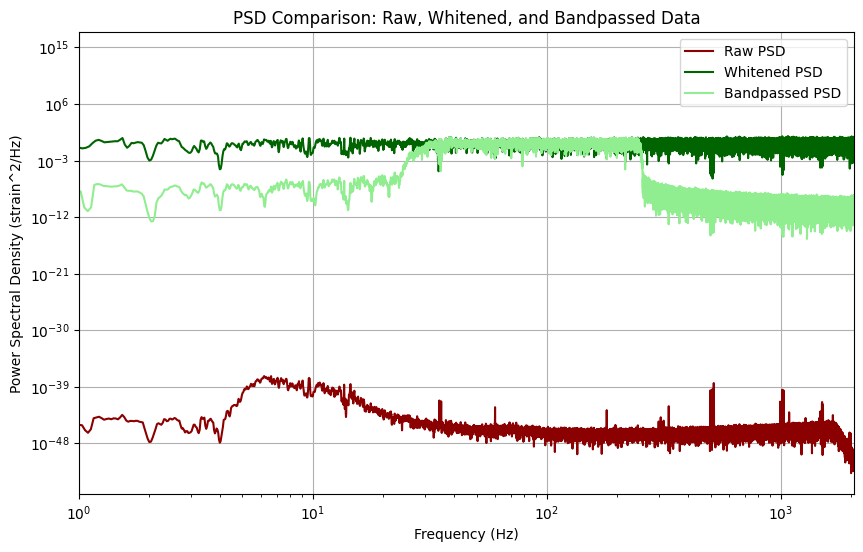

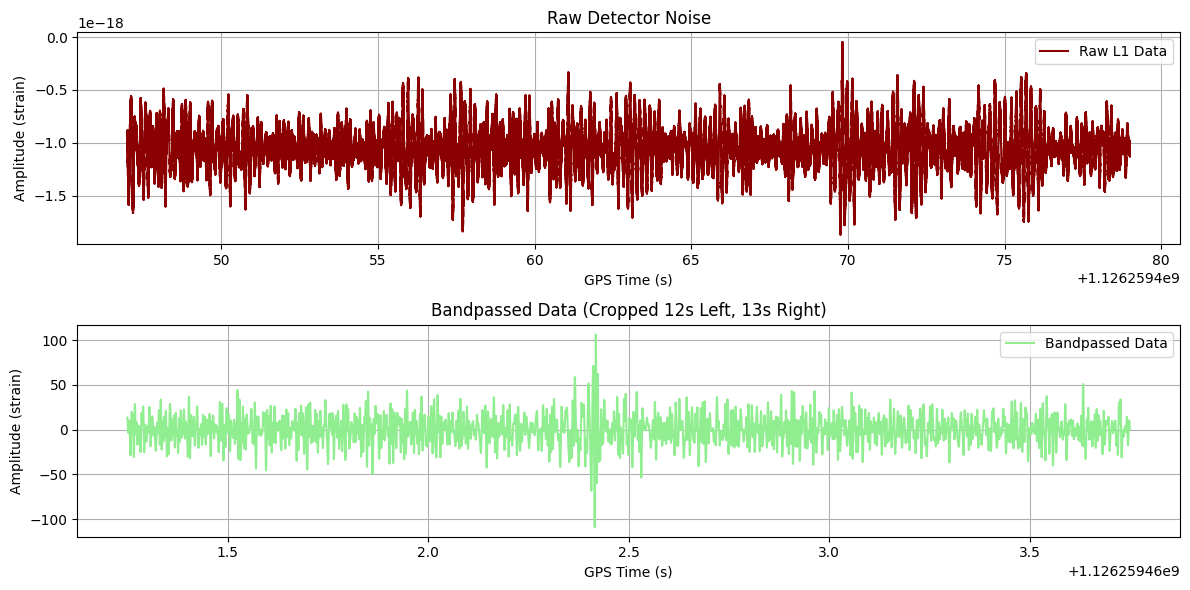

In [9]:
#apply a low-pass filter (cut-off at 250 Hz)
lowpassed_data = whitened_data.lowpass_fir(frequency=250, order=512, beta=5.0, remove_corrupted=True) #remove high-frequency noise

#apply a high-pass filter (cut-off at 30 Hz)
bandpassed_data = lowpassed_data.highpass_fir(frequency=30, order=512, beta=5.0, remove_corrupted=True) #remove low-frequency noise


#estimate the PSD of raw data
raw_psd = data.filter_psd(data.duration, data.delta_f, 1)

#estimate the PSD of whitened data
whitened_data = data.whiten(segment_duration=4, max_filter_duration=4, trunc_method='hann', remove_corrupted=True)
whitened_psd = whitened_data.filter_psd(whitened_data.duration, whitened_data.delta_f, 1)

#estimate the PSD of bandpassed data
bandpassed_psd = bandpassed_data.filter_psd(bandpassed_data.duration, bandpassed_data.delta_f, 1)




#plot the PSDs of raw, whitened, and bandpassed data
plt.figure(figsize=(10, 6))
plt.loglog(raw_psd.get_sample_frequencies(), raw_psd, label="Raw PSD", color='darkred') #raw PSD
plt.loglog(whitened_psd.get_sample_frequencies(), whitened_psd, label="Whitened PSD", color='darkgreen') #whitened PSD
plt.loglog(bandpassed_psd.get_sample_frequencies(), bandpassed_psd, label="Bandpassed PSD", color='lightgreen') #bandpassed PSD

#add labels, title, and legend
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (strain^2/Hz)')
plt.title('PSD Comparison: Raw, Whitened, and Bandpassed Data')
plt.legend()
plt.grid(True)
plt.xlim(1, data.sample_rate / 2)  #limit x-axis from 1 Hz to Nyquist frequency
plt.show()




#crop the bandpassed data: Remove 12 seconds on the left and 13 seconds on the right
cropped_bandpassed_data = bandpassed_data.crop(12, 13)

#plot the cropped bandpassed data vs. raw data
plt.figure(figsize=(12, 6))

#raw data plot
plt.subplot(2, 1, 1)
plt.plot(data.sample_times, data, label='Raw L1 Data', color='darkred')
plt.xlabel('GPS Time (s)')
plt.ylabel('Amplitude (strain)')
plt.title('Raw Detector Noise')
plt.legend()
plt.grid()

#cropped bandpassed data plot
plt.subplot(2, 1, 2)
plt.plot(cropped_bandpassed_data.sample_times, cropped_bandpassed_data, label='Bandpassed Data', color='lightgreen')
plt.xlabel('GPS Time (s)')
plt.ylabel('Amplitude (strain)')
plt.title('Bandpassed Data (Cropped 12s Left, 13s Right)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

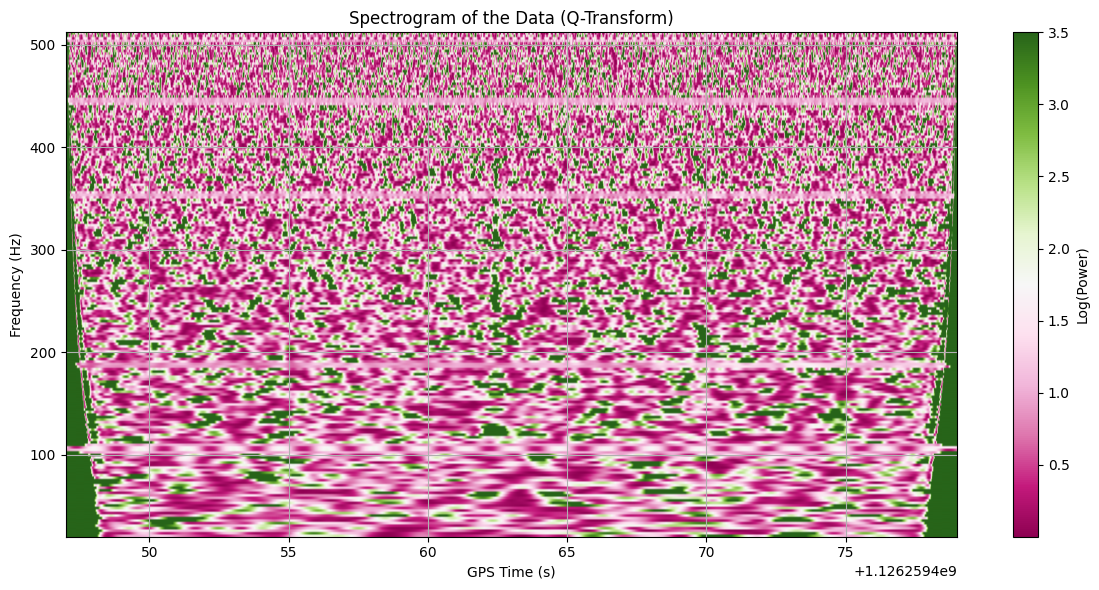

In [10]:
#parameters from  the hint
logfsteps = 200 #number of frequency bins
qrange = (110, 110) #requency range for the Q-transform
frange = (20, 512) #frequency range for the spectrogram
vmax = 3.5 #max value for the color scaling in the plot

#Q-transform (spectrogram) on the data
times, freqs, qplane = data.qtransform(logfsteps=logfsteps, qrange=qrange, frange=frange)

#plot the spectrogram using imshow
#source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.figure(figsize=(12, 6))
plt.imshow(qplane, aspect='auto', origin='lower', cmap='PiYG',
           extent=[times[0], times[-1], freqs[0], freqs[-1]], vmax=vmax)

#adding labels and title
plt.xlabel('GPS Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Data (Q-Transform)')

#show colorbar for the plot
plt.colorbar(label='Log(Power)')

plt.grid(True)
plt.tight_layout()
plt.show()

As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


Good job! This is the end of the second part. Maybe you can go for a break?